<a href="https://colab.research.google.com/github/SedhuRSK/Analysis/blob/main/Analysis_of_TATA_IPL_2025_Auction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
path='/content/drive/MyDrive/Colab Notebooks/1731674068078_TATA IPL 2025- Auction List -15.11.24.csv'

In [75]:
import pandas as pd
data = pd.read_csv(path)
data.columns = [
    "List No", "Set No", "Set Name", "First Name", "Surname", "Country",
    "State", "DOB", "Age", "Specialism", "Test Caps", "ODI Caps", "T20 Caps",
    "IPL Caps", "Previous IPL Teams", "C/U/A", "2024 Team", "2024 IPL",
    "Reserve Price", "Reserve Price Unit", "Base Price"
]
data.dropna(subset=["First Name"], inplace=True)
data.fillna("Unknown", inplace=True)
print(data.head())

       List No   Set No  Set Name  First Name  Surname       Country    State  \
2  List Sr.No.  Set No.  2025 Set  First Name  Surname       Country  Unknown   
5            1        1        M1         Jos  Buttler       England  Unknown   
6            2        1        M1     Shreyas     Iyer         India      MCA   
7            3        1        M1     Rishabh     Pant         India     DDCA   
8            4        1        M1      Kagiso   Rabada  South Africa  Unknown   

          DOB  Age    Specialism  ...            ODI Caps   T20 Caps  \
2         DOB  Age    Specialism  ...             Unknown  Test caps   
5  08/09/1990   34  WICKETKEEPER  ...  RIGHT ARM Off Spin         57   
6  06/12/1994   30        BATTER  ...  RIGHT ARM Off Spin         14   
7  04/10/1997   27        BATTER  ...  RIGHT ARM Off Spin         37   
8  25/05/1995   29        BOWLER  ...      RIGHT ARM Fast         66   

   IPL Caps Previous IPL Teams C/U/A            2024 Team 2024 IPL  \
2  ODI cap

# **Exploratory Data Analysis**
**Objectives**: To understand the dataset's structure and key statistics.

            List No Set No  Set Name  First Name Surname Country    State  \
count           583    583       583         583     583     583      583   
unique          575     79        80         470     447      14       35   
top     List Sr.No.     72  2025 Set  First Name   Singh   India  Unknown   
freq              9     13         9           9      26     366      217   

        DOB  Age Specialism  ...            ODI Caps T20 Caps IPL Caps  \
count   583  583        583  ...                 583      583      583   
unique  551   27          5  ...                  11       60       90   
top     DOB   26     BOWLER  ...  RIGHT ARM Off Spin  Unknown  Unknown   
freq      9   54        204  ...                 119      438      367   

       Previous IPL Teams    C/U/A 2024 Team 2024 IPL Reserve Price  \
count                 583      583       583      583           583   
unique                 91       92       139       16            31   
top               Unknown  Unk

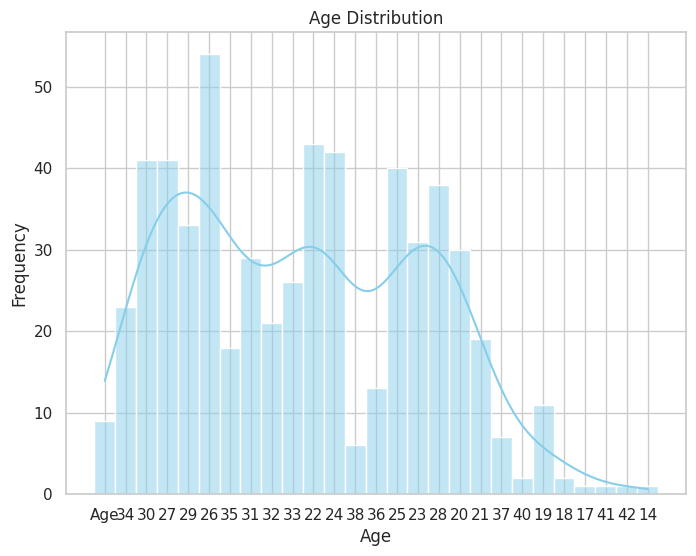

<ipython-input-76-2af6645cf40e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Specialism", data=data, palette="viridis")


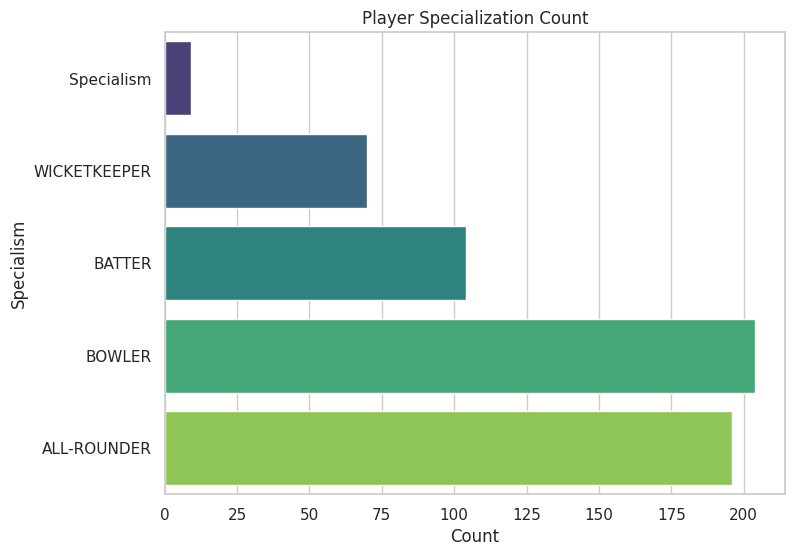

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(data.describe())

# Visualizations
plt.figure(figsize=(8, 6))
sns.histplot(data["Age"], bins=10, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Player specialization count
plt.figure(figsize=(8, 6))
sns.countplot(y="Specialism", data=data, palette="viridis")
plt.title("Player Specialization Count")
plt.xlabel("Count")
plt.ylabel("Specialism")
plt.show()


In [77]:
import pandas as pd

# Assuming your DataFrame is named 'data'
specialisms = data['Specialism']
specialism_counts = specialisms.value_counts()
print(specialism_counts)

Specialism
BOWLER          204
ALL-ROUNDER     196
BATTER          104
WICKETKEEPER     70
Specialism        9
Name: count, dtype: int64


In [78]:
import pandas as pd

# Assuming your DataFrame is named 'data'
specialism_counts = data['Specialism'].value_counts()
total_players = len(data)
specialism_percentages = (specialism_counts / total_players) * 100

print(specialism_percentages)

Specialism
BOWLER          34.991424
ALL-ROUNDER     33.619211
BATTER          17.838765
WICKETKEEPER    12.006861
Specialism       1.543739
Name: count, dtype: float64


# **Player Age Analysis**

**Objectives**:To analyze age distributions and identify patterns.

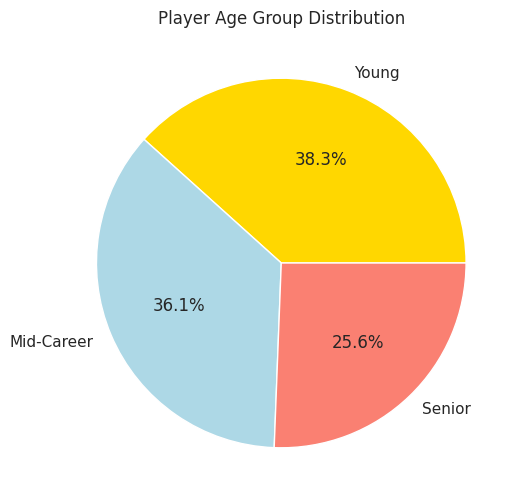

In [79]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

data.dropna(subset=['Age'], inplace=True)


data['Age Group'] = pd.cut(data['Age'], bins=[0, 25, 30, 100], labels=["Young", "Mid-Career", "Senior"])


age_group_counts = data["Age Group"].value_counts()
plt.figure(figsize=(8, 6))
age_group_counts.plot(kind="pie", autopct="%1.1f%%", colors=["gold", "lightblue", "salmon"])
plt.title("Player Age Group Distribution")
plt.ylabel("")
plt.show()

In [80]:
import pandas as pd

age_group_counts = data['Age Group'].value_counts()
total_players = len(data)

# Calculate percentages (percentiles)
age_group_percentages = (age_group_counts / total_players) * 100

# Display results
print("Age Group Counts:")
print(age_group_counts)
print("\nAge Group Percentages:")
print(age_group_percentages)

Age Group Counts:
Age Group
Young         220
Mid-Career    207
Senior        147
Name: count, dtype: int64

Age Group Percentages:
Age Group
Young         38.327526
Mid-Career    36.062718
Senior        25.609756
Name: count, dtype: float64


In [81]:
import pandas as pd

specialism_age_counts = data.groupby(['Specialism', 'Age Group'])['Age Group'].count().unstack(fill_value=0)

print(specialism_age_counts)

Age Group     Young  Mid-Career  Senior
Specialism                             
ALL-ROUNDER      72          79      45
BATTER           45          33      26
BOWLER           77          69      58
WICKETKEEPER     26          26      18


<ipython-input-81-e19442377ba1>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  specialism_age_counts = data.groupby(['Specialism', 'Age Group'])['Age Group'].count().unstack(fill_value=0)


<ipython-input-82-4def0c93d2a1>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  specialism_age_counts = data.groupby(['Specialism', 'Age Group'])['Age Group'].count().unstack(fill_value=0)


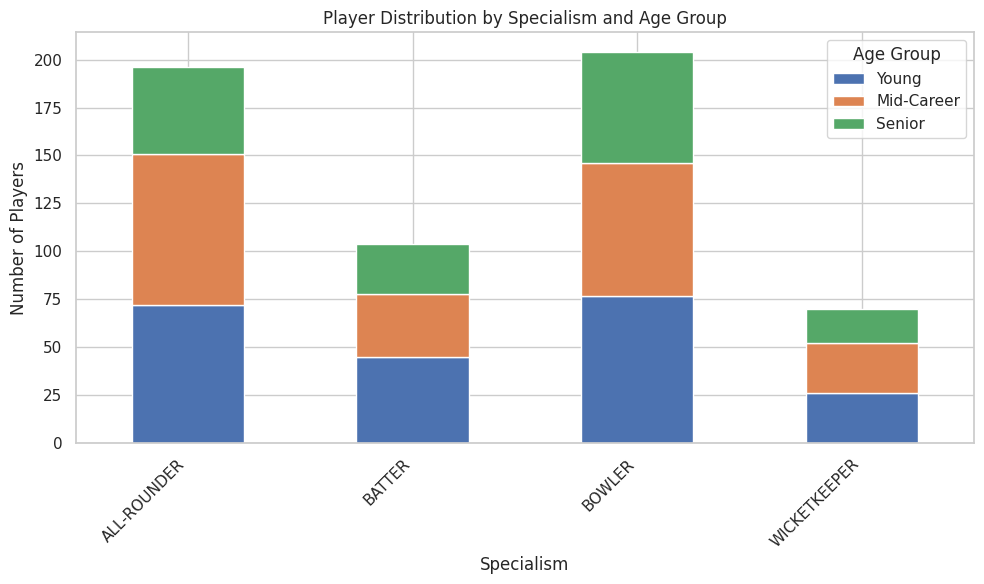

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
specialism_age_counts = data.groupby(['Specialism', 'Age Group'])['Age Group'].count().unstack(fill_value=0)

# Create the plot
specialism_age_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Player Distribution by Specialism and Age Group')
plt.xlabel('Specialism')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

In [83]:
country_specialism_counts = data.groupby(['Country', 'Specialism'])['Specialism'].count().unstack(fill_value=0)
print(country_specialism_counts)

Specialism    ALL-ROUNDER  BATTER  BOWLER  WICKETKEEPER
Country                                                
Afghanistan             6       3       8             1
Australia              14       6      13             4
Bangladesh              3       1       7             1
England                12       4      12             9
India                 130      68     125            43
Ireland                 0       1       1             0
New Zealand             7       7       8             2
Scotland                1       0       0             0
South Africa            7       7      13             4
Sri Lanka               5       2      10             2
USA                     0       0       1             1
West Indies            10       5       4             3
Zimbabwe                1       0       2             0


In [88]:
total_players = len(data)
country_specialism_percentages = (country_specialism_counts / total_players) * 100
print(country_specialism_percentages)

Specialism    ALL-ROUNDER     BATTER     BOWLER  WICKETKEEPER
Country                                                      
Afghanistan      1.045296   0.522648   1.393728      0.174216
Australia        2.439024   1.045296   2.264808      0.696864
Bangladesh       0.522648   0.174216   1.219512      0.174216
England          2.090592   0.696864   2.090592      1.567944
India           22.648084  11.846690  21.777003      7.491289
Ireland          0.000000   0.174216   0.174216      0.000000
New Zealand      1.219512   1.219512   1.393728      0.348432
Scotland         0.174216   0.000000   0.000000      0.000000
South Africa     1.219512   1.219512   2.264808      0.696864
Sri Lanka        0.871080   0.348432   1.742160      0.348432
USA              0.000000   0.000000   0.174216      0.174216
West Indies      1.742160   0.871080   0.696864      0.522648
Zimbabwe         0.174216   0.000000   0.348432      0.000000


Country
India           63.763066
England          6.445993
Australia        6.445993
South Africa     5.400697
New Zealand      4.181185
West Indies      3.832753
Sri Lanka        3.310105
Afghanistan      3.135889
Bangladesh       2.090592
Zimbabwe         0.522648
Ireland          0.348432
USA              0.348432
Scotland         0.174216
Name: count, dtype: float64


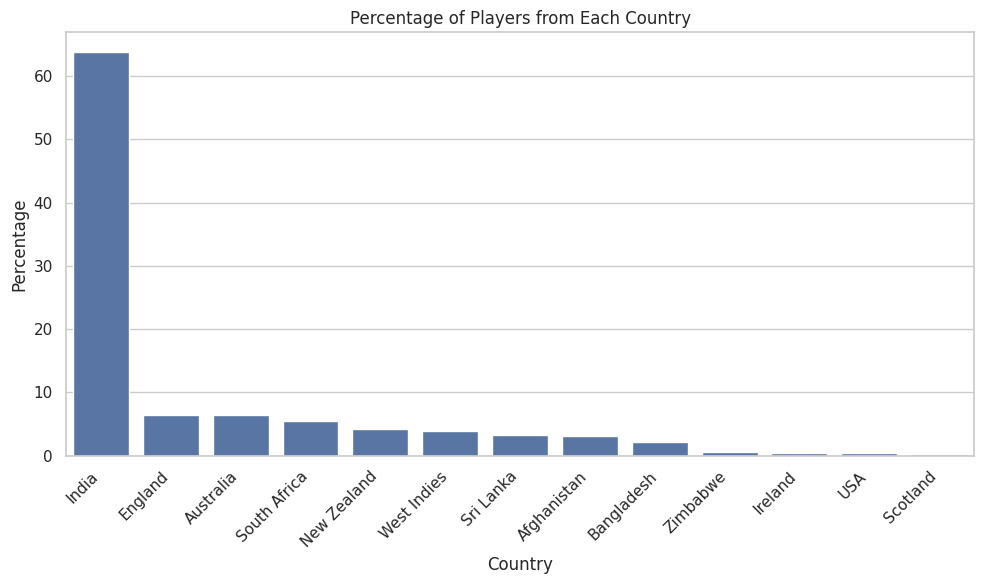

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

total_players = len(data)
country_counts = data['Country'].value_counts()
country_percentages = (country_counts / total_players) * 100
print(country_percentages)

# 5. Visualization (Optional)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_percentages.index, y=country_percentages.values)
plt.title("Percentage of Players from Each Country")
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

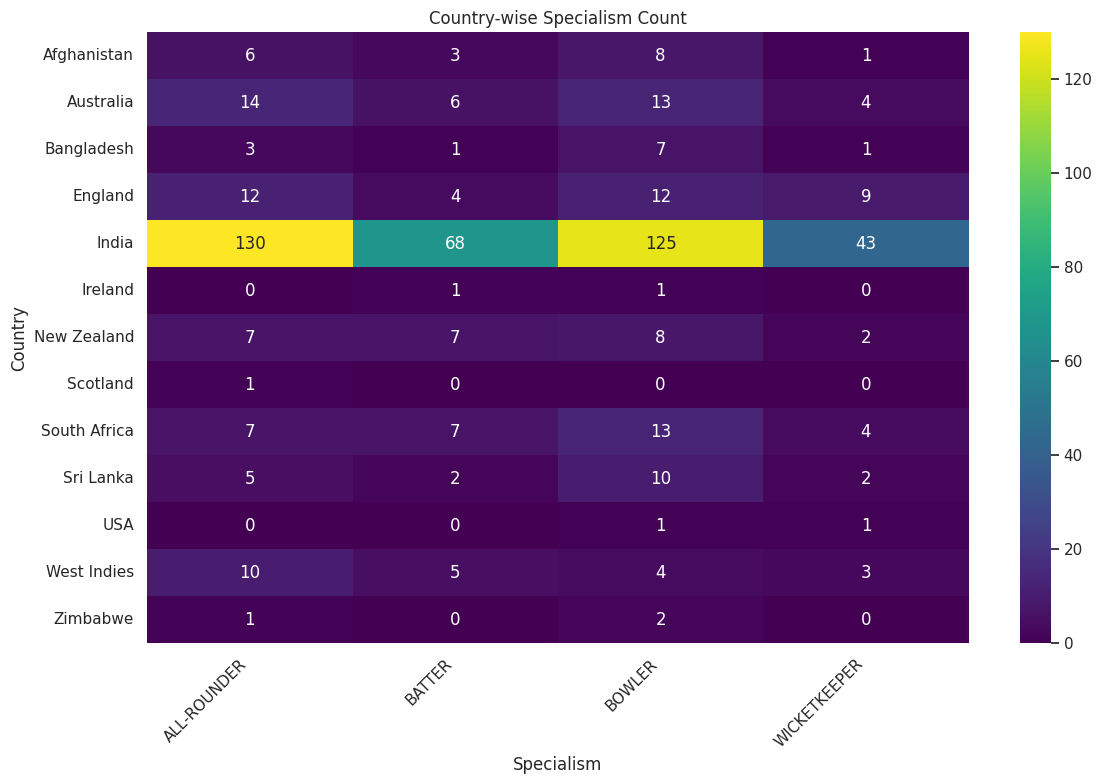

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(country_specialism_counts, annot=True, cmap="viridis", fmt="d")
plt.title("Country-wise Specialism Count")
plt.xlabel("Specialism")
plt.ylabel("Country")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [86]:
country_age_specialism_counts = data.groupby(['Country', 'Age Group', 'Specialism'])['Specialism'].count().unstack(fill_value=0)
print(country_age_specialism_counts)

Specialism               ALL-ROUNDER  BATTER  BOWLER  WICKETKEEPER
Country      Age Group                                            
Afghanistan  Young                 3       2       7             1
             Mid-Career            1       0       1             0
             Senior                2       1       0             0
Australia    Young                 2       2       1             0
             Mid-Career            3       0       7             3
             Senior                9       4       5             1
Bangladesh   Young                 0       1       4             0
             Mid-Career            2       0       3             1
             Senior                1       0       0             0
England      Young                 2       0       1             1
             Mid-Career            6       3       2             5
             Senior                4       1       9             3
India        Young                58      35      53          

<ipython-input-86-f2ead21091fb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_age_specialism_counts = data.groupby(['Country', 'Age Group', 'Specialism'])['Specialism'].count().unstack(fill_value=0)


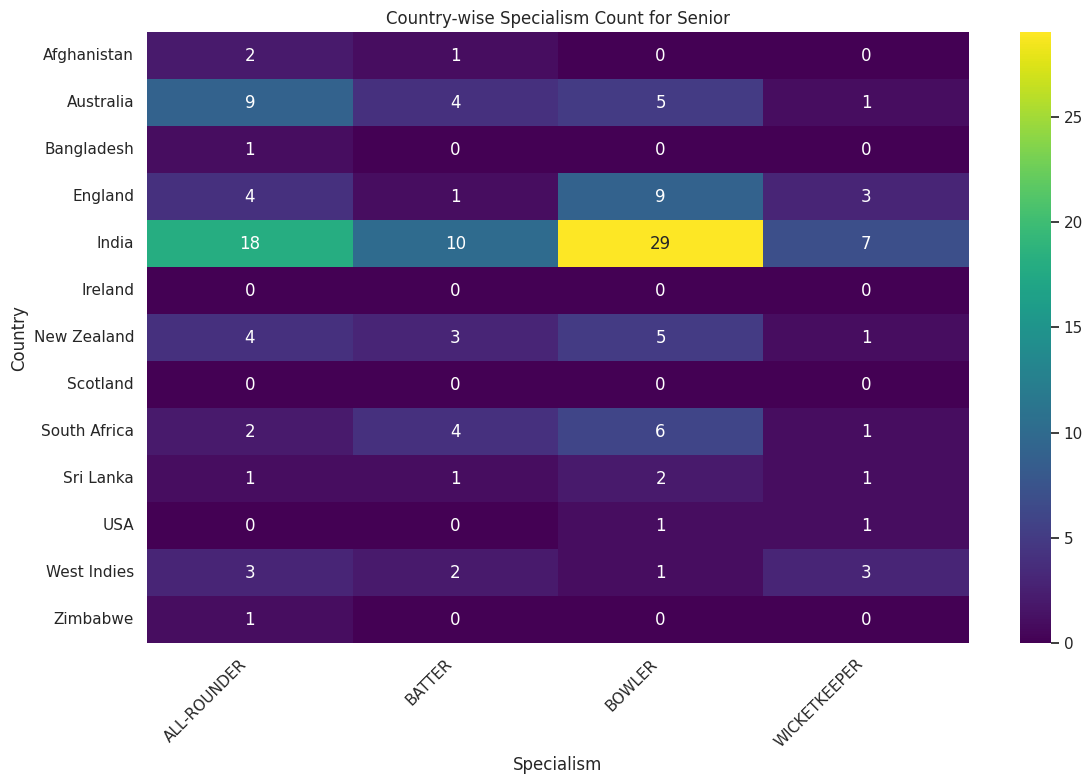

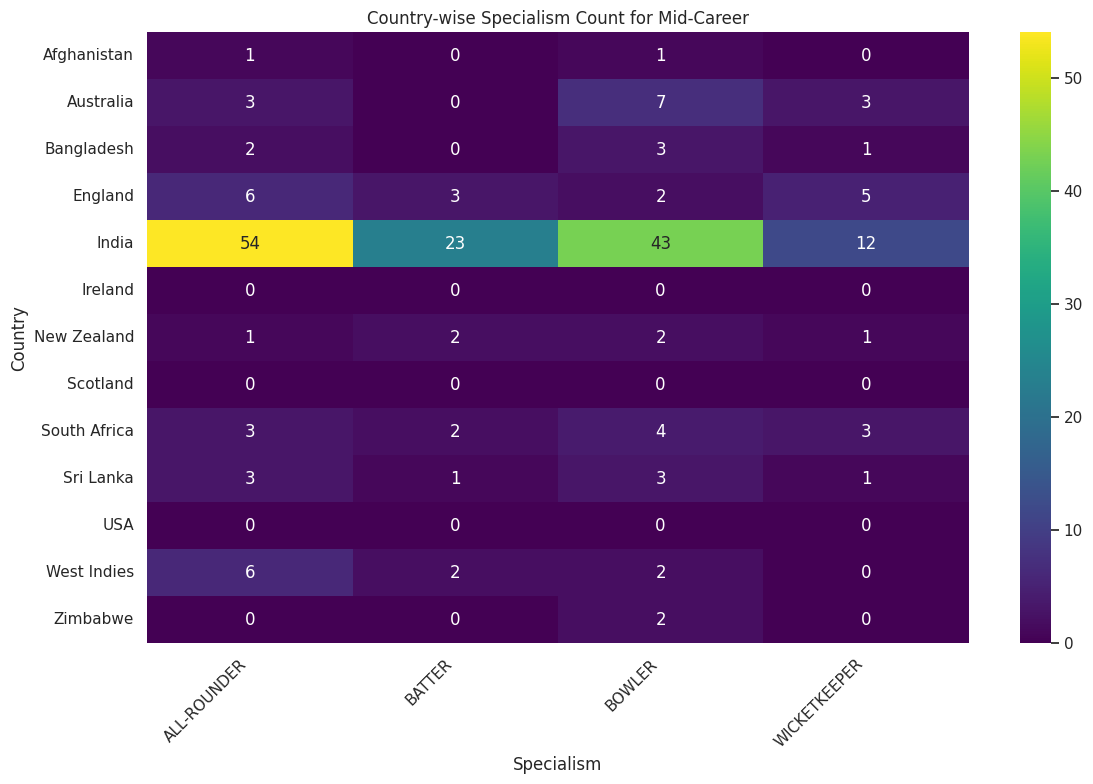

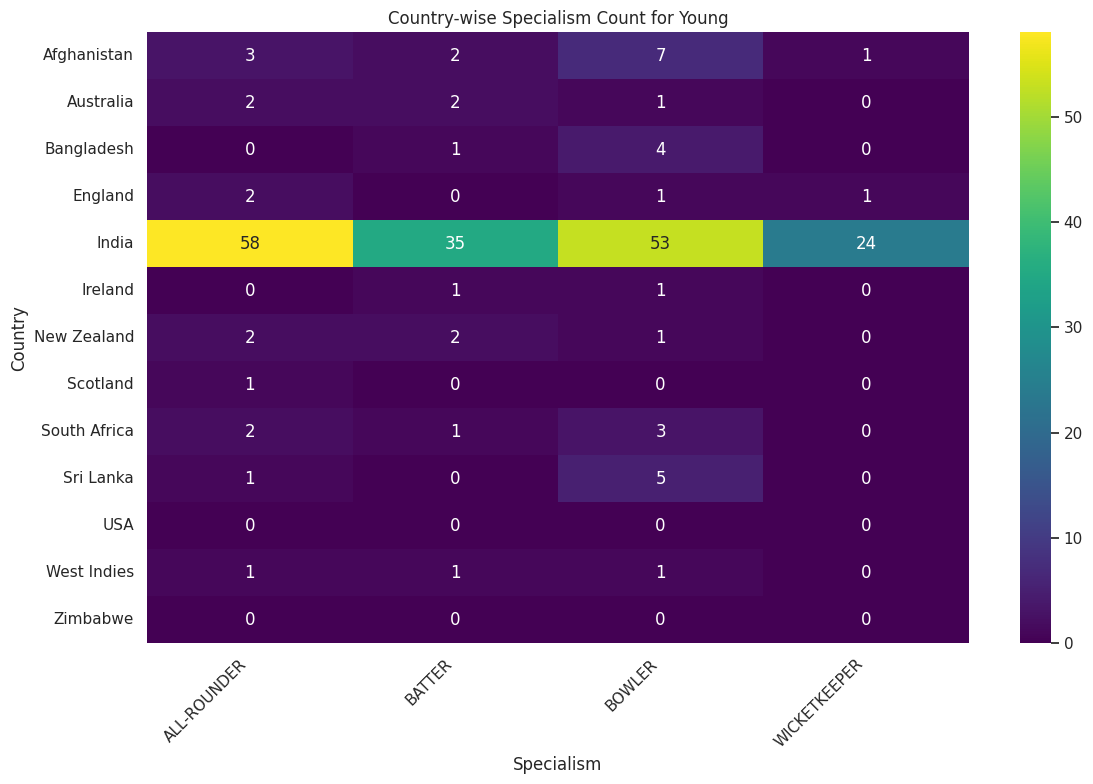

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

for age_group in data['Age Group'].unique():
    age_group_data = country_age_specialism_counts.loc[pd.IndexSlice[:, age_group, :]]
    plt.figure(figsize=(12, 8))
    sns.heatmap(age_group_data, annot=True, cmap="viridis", fmt="d")
    plt.title(f"Country-wise Specialism Count for {age_group}")
    plt.xlabel("Specialism")
    plt.ylabel("Country")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# **Analyzing Price Differences Between Indian and Foreign Players**

**Objective**: To compare and analyze the base price differences between Indian and foreign players in IPL auctions using statistical measures and visualizations.

Indian Player Base Price Statistics:
count    140.000000
mean      68.464286
std       63.108609
min       30.000000
25%       30.000000
50%       30.000000
75%       75.000000
max      200.000000
Name: Base Price, dtype: float64

Foreign Player Base Price Statistics:
count    101.000000
mean     150.742574
std       54.135876
min       50.000000
25%       75.000000
50%      150.000000
75%      200.000000
max      200.000000
Name: Base Price, dtype: float64

Difference in Mean Base Price: 82.27828854314002


<ipython-input-90-384ff751cdf0>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(indian_prices, color="blue", label="Indian Players", shade=True)
<ipython-input-90-384ff751cdf0>:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(foreign_prices, color="orange", label="Foreign Players", shade=True)


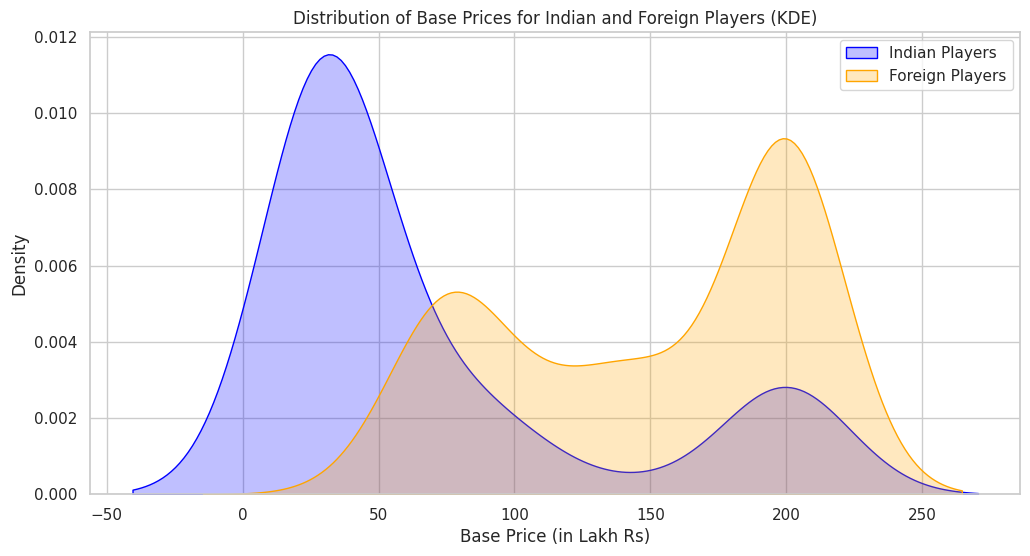

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

price_column = "Base Price"
indian_prices = indian_players[price_column].dropna()
foreign_prices = foreign_players[price_column].dropna()

indian_stats = indian_prices.describe()
foreign_stats = foreign_prices.describe()
mean_diff = foreign_stats['mean'] - indian_stats['mean']


print("Indian Player Base Price Statistics:")
print(indian_stats)
print("\nForeign Player Base Price Statistics:")
print(foreign_stats)
print("\nDifference in Mean Base Price:", mean_diff)

plt.figure(figsize=(12, 6))
sns.kdeplot(indian_prices, color="blue", label="Indian Players", shade=True)
sns.kdeplot(foreign_prices, color="orange", label="Foreign Players", shade=True)
plt.xlabel("Base Price (in Lakh Rs)")
plt.ylabel("Density")
plt.title("Distribution of Base Prices for Indian and Foreign Players (KDE)")
plt.legend()
plt.show()

**Correlation Analysis**

**Objective**: To find the correlation between Test, ODI, T20, and IPL caps.

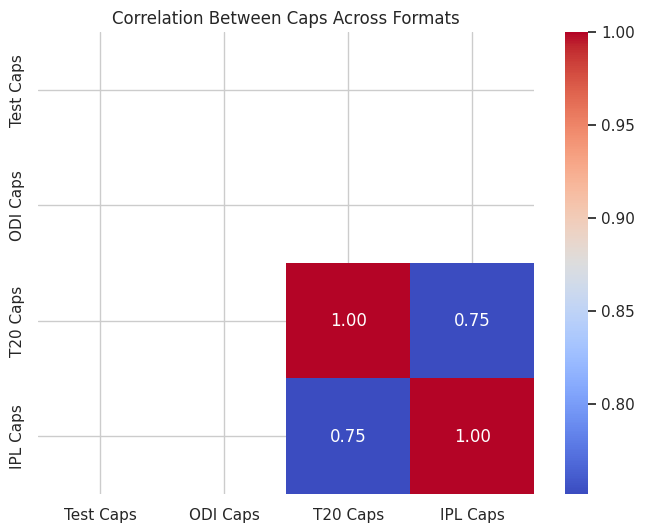

In [ ]:
# Correlation matrix
caps_data = data[["Test Caps", "ODI Caps", "T20 Caps", "IPL Caps"]]
caps_data = caps_data.apply(pd.to_numeric, errors="coerce").fillna(0)
correlation_matrix = caps_data.corr()

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Caps Across Formats")
plt.show()


# **Auction Trends**

**Objectives**: To analyze auction trends

<ipython-input-68-f07ddc25f143>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette="magma")


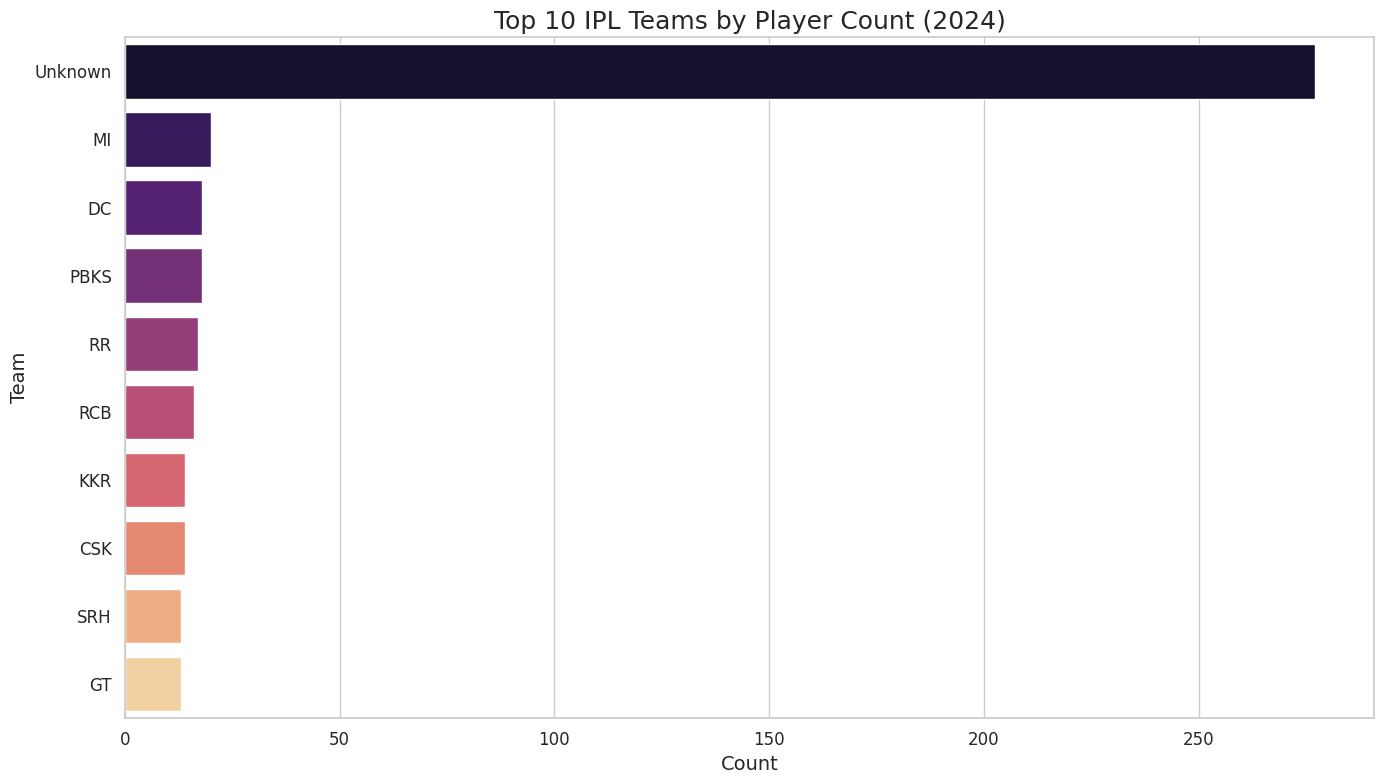

In [ ]:

team_trends = data["2024 Team"].value_counts()

top_teams = team_trends.head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_teams.values, y=top_teams.index, palette="magma")
plt.title("Top 10 IPL Teams by Player Count (2024)", fontsize=18)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Team", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()




# **Predictive Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd


data["Selected"] = data["2024 Team"].apply(lambda x: 1 if x != "Unknown" else 0)


caps_data = data[["Test Caps", "ODI Caps", "T20 Caps", "IPL Caps"]].apply(pd.to_numeric, errors="coerce").fillna(0)
age_data = data[["Age"]].apply(pd.to_numeric, errors="coerce").fillna(0)
specialism_dummies = pd.get_dummies(data["Specialism"], prefix="Specialism", drop_first=True)

features = pd.concat([caps_data, age_data, specialism_dummies], axis=1)
target = data["Selected"]


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

           0       0.53      0.58      0.55        78
           1       0.62      0.58      0.60        95

    accuracy                           0.58       173
   macro avg       0.58      0.58      0.58       173
weighted avg       0.58      0.58      0.58       173



# **Data** **Extraction**

In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/Colab Notebooks/1731674068078_TATA IPL 2025- Auction List -15.11.24.csv'
data = pd.read_csv(path)
data.columns = [
    "List No", "Set No", "Set Name", "First Name", "Surname", "Country",
    "State", "DOB", "Age", "Specialism", "Test Caps", "ODI Caps", "T20 Caps",
    "IPL Caps", "Previous IPL Teams", "C/U/A", "2024 Team", "2024 IPL",
    "Reserve Price", "Reserve Price Unit", "Base Price"
]
data.dropna(subset=["First Name"], inplace=True)
data.fillna("Unknown", inplace=True)
print(data.head())
data.dropna(subset=["First Name"], inplace=True)
data.fillna("Unknown", inplace=True)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Base Price'] = pd.to_numeric(data['Base Price'], errors='coerce')
data.dropna(subset=['Age', 'Base Price'], inplace=True)
data.to_csv("Final_cleaned_ipl_data.csv", index=False)

       List No   Set No  Set Name  First Name  Surname       Country    State  \
2  List Sr.No.  Set No.  2025 Set  First Name  Surname       Country  Unknown   
5            1        1        M1         Jos  Buttler       England  Unknown   
6            2        1        M1     Shreyas     Iyer         India      MCA   
7            3        1        M1     Rishabh     Pant         India     DDCA   
8            4        1        M1      Kagiso   Rabada  South Africa  Unknown   

          DOB  Age    Specialism  ...            ODI Caps   T20 Caps  \
2         DOB  Age    Specialism  ...             Unknown  Test caps   
5  08/09/1990   34  WICKETKEEPER  ...  RIGHT ARM Off Spin         57   
6  06/12/1994   30        BATTER  ...  RIGHT ARM Off Spin         14   
7  04/10/1997   27        BATTER  ...  RIGHT ARM Off Spin         37   
8  25/05/1995   29        BOWLER  ...      RIGHT ARM Fast         66   

   IPL Caps Previous IPL Teams C/U/A            2024 Team 2024 IPL  \
2  ODI cap